This notebook contains code related to an investigation on mmseqs2's Neff scores.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import torch
import torch.nn.functional as F
from af22c import neff
from af22c.mmseqs import mmseqs_neff_from_a3m
from af22c.msa import EncMsa
from af22c.scores import pwseq, identity_seq_weights, henikoff_seq_weights
import matplotlib.pyplot as plt

In [4]:
mmseqs = "/home/johannes/uni/idp/MMseqs2/cmake-build-debug/src/mmseqs"
MSA_PATH = "../data/Q9AAS4.a3m"
MSA_PATH = "/home/johannes/uni/idp/MMseqs2/test/mini.a3m"

In [5]:
mmseqs_scores = mmseqs_neff_from_a3m(MSA_PATH,mmseqs)

In [6]:
msa = EncMsa.from_thing(MSA_PATH)

In [7]:
M = F.one_hot(msa.data.long(), len(msa.vocab))

In [8]:
# NB: this is not Heinkoff weighting, but seqid weighting!
w = henikoff_seq_weights(msa, verbose=1); w

calc weights: 100%|██████████████████████████████████████████████████████| 4/4 [00:00<00:00, 1475.57it/s]


tensor([0.2812, 0.2188, 0.2396, 0.2604])

In [17]:
f = torch.einsum("i,ijk->jk", w, M.float())

In [18]:
nf = f / f.sum(dim=1).view(-1,1) + 1e-4 # TODO: find out whether +1 is ok

In [19]:
nf.shape

torch.Size([8, 22])

In [20]:
neff = 2 ** (-(nf * nf.log2()).sum(1) / msa.data.shape[1])

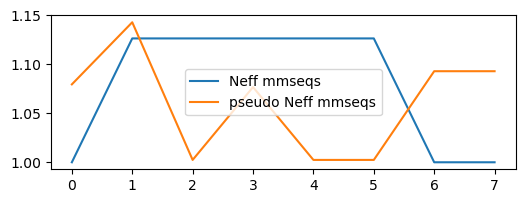

In [22]:
plt.figure(figsize=(6,2))
plt.plot(mmseqs_scores,label="Neff mmseqs")
plt.plot(neff,label="pseudo Neff mmseqs")
plt.legend();